In [4]:
from qiskit import *
from qiskit import QuantumRegister
from qiskit import QuantumRegister, ClassicalRegister
from qiskit import QuantumCircuit, execute, IBMQ
import matplotlib as mpl
import random
import pylatexenc


# Logic Gates

In [5]:
IBMQ.enable_account("83eab2c789e4b9b5030af0f6cdcf31f3efe4f59d505bff881e43504814b25b12526b1aa8c2b5826af475da8c49d3ca4f99189e59287d8040cb3750b728aa6b76")
provider = IBMQ.get_provider(hub="ibm-q")

/Users/angelobenoit/opt/miniconda3/envs/cse468/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: The package qiskit.providers.ibmq is being deprecated. Please see https://ibm.biz/provider_migration_guide to get instructions on how to migrate to qiskit-ibm-provider (https://github.com/Qiskit/qiskit-ibm-provider) and qiskit-ibm-runtime (https://github.com/Qiskit/qiskit-ibm-runtime).
  """Entry point for launching an IPython kernel.
/Users/angelobenoit/opt/miniconda3/envs/cse468/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: The qiskit.IBMQ entrypoint and the qiskit-ibmq-provider package (accessible from 'qiskit.providers.ibmq`) are deprecated and will be removed in a future release. Instead you should use the qiskit-ibm-provider package which is accessible from 'qiskit_ibm_provider'. You can install it with 'pip install qiskit_ibm_provider'. Just replace 'qiskit.IBMQ' with 'qiskit_ibm_provider.IBMProvider'
  """Entry point for launching an

In [13]:
class QC:
    def __init__(self, genBarriers=True):
        self.regNum = 0
        self.genBarriers = genBarriers
        self.qc = QuantumCircuit()
        self.falseBit = self.addReg('false')
        self.trueBit  = self.addReg('true')
        self.qc.x(self.trueBit)
        
    
    def addReg(self, prefix=""):
        name = self.get_name(prefix)
        result = QuantumRegister(1, name)
        self.qc.add_register(result)
        return result

    def barrier(self):
        if self.genBarriers:
            self.qc.barrier()

    def em(self, shots=512):
        em = BasicAer.get_backend("qasm_simulator")
        job = execute(self.qc, em, shots=shots)
        hist = job.result().get_counts()
        return hist
    
    def sv(self):
        svs = BasicAer.get_backend("statevector_simulator")
        job = execute(self.qc, svs)
        ket = job.result().get_statevector()
        return ket
    
    def get_name(self, prefix=""):
        name = prefix+"_"+str(self.regNum)
        self.regNum+=1
        return name
    
    def genOutput(self, reg, name):
        reg = reg if reg else self.addReg(name)
        return reg
    
    def qand(self, bit1, bit2, output=None):
        output = self.genOutput(output, "and")
        self.barrier()
        self.qc.ccx(bit1, bit2, output)
        self.barrier()
        return output


    def qor(self, bit1, bit2, output=None):
        output = self.genOutput(output, "or")
        self.barrier()
        self.qc.cx(bit1, output)
        self.qc.cx(bit2, output)
        self.qc.ccx(bit1, bit2, output)
        self.barrier()
        return output
    
    def qxor(self, bit1, bit2, output=None):
        output = self.genOutput(output, "xor")
        self.barrier()
        self.qc.cx(bit1, output)
        self.qc.cx(bit2, output)
        self.barrier()
        return output

    def qnot(self, bit, output=None):
        output = self.genOutput(output, "not")
        self.barrier()
        self.qc.x(bit)
        self.qc.cx(bit, output)
        self.qc.x(bit)
        self.barrier()
        return output

    def qnand(self, bit1, bit2, output=None):
        output = self.genOutput(output, "nand")
        self.barrier()
        self.qc.ccx(bit1, bit2, output)
        self.qc.x(output)
        self.barrier()
        return output
    
    
    def draw(self, output='mpl'):
        return self.qc.draw(output=output)
    
# class Adder(QC):
#     def __init__(self):
#         super().__init__()

#     def adder_func(self, bit0, bit1,  cIn = QuantumRegister(1, self.get_name(self))):
       
#         cOut = QuantumRegister(1, self.get_name(self))
#         sum = QuantumRegister(1, self.get_name(self))
#         self.qc.add_register(cIn)
#         self.qc.add_register(sum)
#         self.qc.add_register(cOut)
#         self.qc.cx(bit0, sum)
#         self.qc.cx(bit1, sum)
#         self.qc.cx(cIn, sum)
        
#         cOut = self.or_qbit(self.qc, self.or_qbit(self.qc, self.and_qbit(self.qc, bit0, bit1), self.and_qbit(self.qc, bit1, cIn)), self.and_qbit(self.qc, bit0, cIn))

#         return sum, cOut

    
    

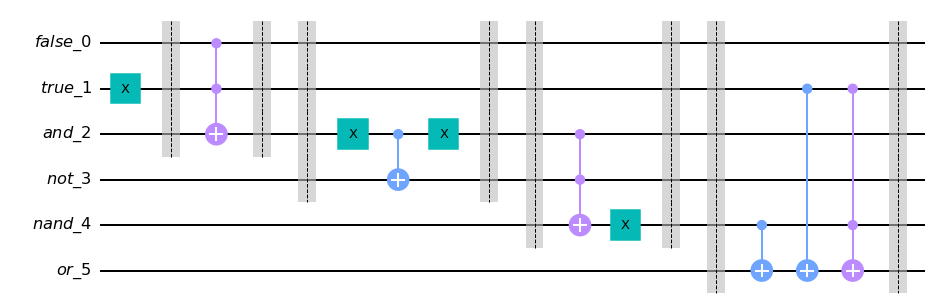

In [14]:
qc = QC()
r = qc.qand(qc.trueBit,qc.falseBit)
qc.qxor(qc.qor(qc.qnand(qc.qnot(r),r),qc.trueBit),r)
qc.draw()



#---------------------------------------------------------

# def and_qbit(qc, bit1, bit2, output = QuantumRegister(1)): #create class with new generator for count
#     qc.add_register(output)
#     qc.barrier()
#     qc.ccx(bit1, bit2, output)
#     qc.barrier()
#     return output


# def or_qbit(qc, bit1, bit2, output = QuantumRegister(1)):
#     qc.add_register(output)
#     qc.barrier()
#     qc.cx(bit1, output)
#     qc.cx(bit2, output)
#     qc.ccx(bit1, bit2, output)
#     qc.barrier()
#     return output

# def not_qbit(qc, bit, output = QuantumRegister(1)):
#     qc.add_register(output)
#     qc.barrier()
#     qc.x(bit)
#     qc.cx(bit, output)
#     qc.x(bit)
#     qc.barrier()
#     return output

# def nand_qbit(qc, bit1, bit2, output = QuantumRegister(1)):
#     qc.add_register(output)
#     qc.barrier()
#     qc.ccx(bit1, bit2, output)
#     qc.x(output)
#     qc.barrier()
#     return output


# not_qbit(qc1, q[0])
# #-------------------------------------------
# and_qbit(qc1, q[0], q[1])
# #-------------------------------------------
# or_qbit(qc1, q[1], q[2])
# #-------------------------------------------
# nand_qbit(qc1, q[0], q[2])
# #-------------------------------------------
# display(qc1.draw('mpl'))

# Recursive Circuit Gate Method Calls

Trying the adder circuit from the S = a + b + c

In [27]:
q4 = QuantumRegister(3,'q')
c4 = ClassicalRegister(2,'c')
qc4 = QuantumCircuit(q4,c4)

qc4.x(q4[0])
qc4.x(q4[1])
qc4.x(q4[2])

#calculate S
temp_sum = QuantumRegister(1, "s")
qc4.add_register(temp_sum)
qc4.cx(q4[0], temp_sum)
qc4.cx(q4[1], temp_sum)
qc4.cx(q4[2], temp_sum)
qc4.measure(temp_sum, 0)

qc4.barrier()


#calculate C (1 if 2+ arguments of a,b,c are 1)
# temp_and = QuantumRegister(1, 'and_result')
# and_qbit(qc4, q[0], q[1], temp_and)

# temp_and2 = QuantumRegister(1, 'and_result2')
# and_qbit(qc4, q[1], q[2], temp_and2)

# temp_and3 = QuantumRegister(1, 'and_result3')
# and_qbit(qc4, q[0], q[2], temp_and3)

# temp_or = QuantumRegister(1, 'or_result')
# or_qbit(qc4, temp_and, temp_and2, temp_or)

# temp_or2 = QuantumRegister(1, 'carry')
# or_qbit(qc4, temp_or, temp_and3, temp_or2)







# or(or(and,and),and)


qc4.measure(or_qbit(qc4, or_qbit(qc4, and_qbit(qc4, q[0], q[1]), and_qbit(qc4, q[1], q[2])), and_qbit(qc4, q[0], q[2])), 1)

display(qc4.draw('mpl'))



CircuitError: 'register name "q25" already exists'

In [26]:
backend = provider.get_backend("ibmq_qasm_simulator")
job = execute(qc4, backend, shots=1)
result = job.result()
counts = result.get_counts(qc4)
print("RESULT: ",counts,"\n")

RESULT:  {'11': 1} 



# Methods for recursive logic gate calls

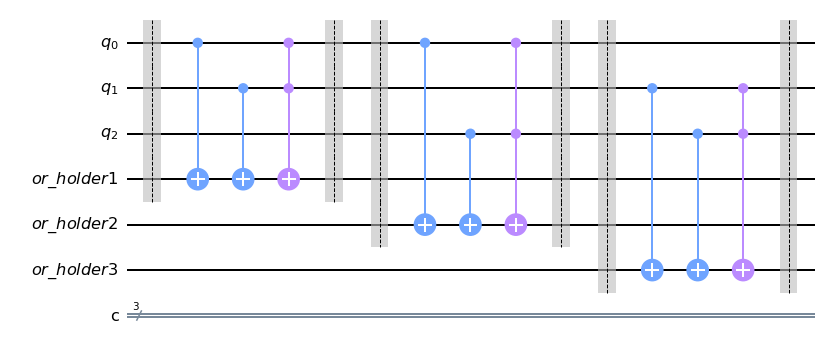

In [5]:
# methods for executing recursive and, or, not, nand gate calls

q_rec = QuantumRegister(3,'q')
c_rec = ClassicalRegister(3,'c')
qc_rec = QuantumCircuit(q_rec,c_rec)


def recursive_and(qc):
    len = qc.num_qubits
    count = 0
    for i in range(len):
        x = i + 1
        for j in range(x, len):
            count = count + 1
            and_qbit(qc, qc.qubits[i], qc.qubits[j], output=QuantumRegister(1, "and_holder" + str(count)))

def recursive_or(qc):
    len = qc.num_qubits
    count = 0
    for i in range(len):
        x = i + 1
        for j in range(x, len):
            count = count + 1
            or_qbit(qc, qc.qubits[i], qc.qubits[j], output=QuantumRegister(1, "or_holder" + str(count)))

def recursive_not(qc):
    len = qc.num_qubits
    for i in range(len):
        not_qbit(qc, qc.qubits[i], output=QuantumRegister(1, "not_holder" + str(i)))

def recursive_nand(qc):
    len = qc.num_qubits
    count = 0
    for i in range(len):
        x = i + 1
        for j in range(x, len):
            count = count + 1
            nand_qbit(qc, qc.qubits[i], qc.qubits[j], output=QuantumRegister(1, "nand_holder" + str(count)))


recursive_or(qc_rec)
display(qc_rec.draw('mpl'))
recursive_and(qc_rec)
#display(qc_rec.draw('mpl'))
recursive_nand(qc_rec)
#display(qc_rec.draw('mpl'))
recursive_not(qc_rec)
#display(qc_rec.draw('mpl'))



# K bit Quantum Adder from two integers

111 10001
00111 10001


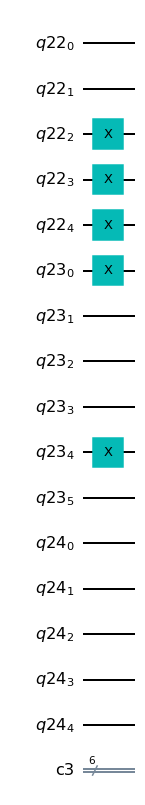

In [24]:
#given two integer values, build a quantum circuit to add them together
def adder(val1, val2):
    
    #------------ circuit initialization ------------
    
    bval = bin(val1)[2:]
    bval2 = bin(val2)[2:]
    print(bval, bval2)
    reg_len = max(len(bval), len(bval2))
    num_1 = QuantumRegister(reg_len) #qubits needed to represent first number
    num_2 = QuantumRegister(reg_len + 1) #qubits needed to represent second number & potential extra qubit for sum
    carry = QuantumRegister(reg_len) #qubits for carry bits
    class_holder = ClassicalRegister(reg_len + 1) #measurements result in sum
    qc = QuantumCircuit(num_1, num_2, carry, class_holder)

    #------------ normalizing binary strings to common length ------------

    diff = abs(len(bval) - len(bval2))
    prep = ''
    for i in range(diff):
        prep = prep + '0'
    if(len(bval) < len(bval2)): #normalize binary strings by prepending 0s
        bval = prep + bval
    elif(len(bval2) < len(bval)):
        bval2 = prep + bval2
    print(bval, bval2)


    #------------ transpose classical numbers to quantum bits ------------
    for j in range(len(bval)):
        if bval[j] == '1':
            qc.x(j)
    # for k in range(len(bval2)):
        if bval2[j] == '1':
            qc.x(len(num_1) + j)

    #----------- adder function ----------
    for j in range(len(bval)):
        if j == 0:
            sum, cOut = adder_func(qc, bval[j], bval2[j])
        else:
            sum, cOut = adder_func(qc, bval[j], bval2[j], cIn=cOut)
    qc.measure(cOut)
    
    display(qc.draw('mpl'))

    


adder(7, 17)